<a href="https://colab.research.google.com/github/ShubhangJani/NYCPropertySales/blob/master/NYC_Property_Sales_DS_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving nyc-rolling-sales.csv to nyc-rolling-sales.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(data_to_load['nyc-rolling-sales.csv'])) #dataframe

Data Cleaning

Manhattan = 1
Bronx = 2
Brooklyn = 3
Queens = 4
Staten Island = 5

In [ ]:
# Renaming the Columns
data = data.rename(columns={'BUILDING CLASS CATEGORY': 'BUILDING_CLASS_CATEGORY', 'TAX CLASS AT PRESENT': 'TAX_CLASS_AT_PRESENT', 
                           'BUILDING CLASS AT PRESENT': 'BUILDING_CLASS_AT_PRESENT', 'APARTMENT NUMBER': 'APARTMENT_NUMBER',
                            'ZIP CODE': 'ZIP_CODE', 'RESIDENTIAL UNITS': 'RESIDENTIAL_UNITS', 'COMMERCIAL UNITS': 'COMMERCIAL_UNITS',
                            'TOTAL UNITS': 'TOTAL_UNITS', 'LAND SQUARE FEET': 'LAND_SQUARE_FEET', 'GROSS SQUARE FEET': 'GROSS_SQUARE_FEET',
                            'YEAR BUILT': 'YEAR_BUILT', 'TAX CLASS AT TIME OF SALE': 'TAX_CLASS_AT_TIME_OF_SALE', 
                            'BUILDING CLASS AT TIME OF SALE': 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE PRICE':'SALE_PRICE', 'SALE DATE': 'SALE_DATE'})

In [ ]:
data = data.drop(data[data.SALE_PRICE < 10000].index) #removing all rows that have a sale price under $10000

In [ ]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,9/23/2016 0:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,11/7/2016 0:00


In [ ]:
len(data)

58465

In [ ]:
data['LAND_SQUARE_FEET'].value_counts() #how many missing values, aka 0

0        29055
2000      2376
2500      2120
4000      1909
1800       761
         ...  
7725         1
5676         1
30240        1
52727        1
7167         1
Name: LAND_SQUARE_FEET, Length: 4756, dtype: int64

In [ ]:
data['GROSS_SQUARE_FEET'].value_counts() #how many missing values, aka 0

0        30029
1800       244
1600       235
1440       234
2400       231
         ...  
26556        1
8115         1
3985         1
10100        1
7980         1
Name: GROSS_SQUARE_FEET, Length: 4453, dtype: int64

In [ ]:
data = data.drop(data[data.LAND_SQUARE_FEET == 0].index) #removing all rows that are missing, aka have a value of 0

In [ ]:
data = data.drop(data[data.GROSS_SQUARE_FEET == 0].index) #removing all rows that are missing, aka have a value of 0

In [ ]:
data[['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET']]

,LAND_SQUARE_FEET,GROSS_SQUARE_FEET
0,1633,6440
3,2272,6794
4,2369,4615
6,1750,4226
9,4489,18523
...,...,...
84543,2400,2575
84544,2498,2377
84545,4000,1496
84546,208033,64117


In [ ]:
data.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,10/27/2016 0:00


In [ ]:
len(data)

28432

In [ ]:
data.info

<bound method DataFrame.info of        Unnamed: 0  BOROUGH  ... SALE_PRICE        SALE_DATE
0               4        1  ...    6625000   7/19/2017 0:00
3               7        1  ...    3936272   9/23/2016 0:00
4               8        1  ...    8000000  11/17/2016 0:00
6              10        1  ...    3192840   9/23/2016 0:00
9              13        1  ...   16232000   11/7/2016 0:00
...           ...      ...  ...        ...              ...
84543        8409        5  ...     450000  11/28/2016 0:00
84544        8410        5  ...     550000   4/21/2017 0:00
84545        8411        5  ...     460000    7/5/2017 0:00
84546        8412        5  ...   11693337  12/21/2016 0:00
84547        8413        5  ...      69300  10/27/2016 0:00

[28432 rows x 22 columns]>

In [ ]:
data.head(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00


In [ ]:
data.reset_index(inplace=True) #reset index in order

In [ ]:
data.columns

Index(['index', 'Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD',
       'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT',
       'EASE-MENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER',
       'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [ ]:
 data.isnull().sum() #verify that there is no missing data left

index                             0
Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING_CLASS_CATEGORY           0
TAX_CLASS_AT_PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING_CLASS_AT_PRESENT         0
ADDRESS                           0
APARTMENT_NUMBER                  0
ZIP_CODE                          0
RESIDENTIAL_UNITS                 0
COMMERCIAL_UNITS                  0
TOTAL_UNITS                       0
LAND_SQUARE_FEET                  0
GROSS_SQUARE_FEET                 0
YEAR_BUILT                        0
TAX_CLASS_AT_TIME_OF_SALE         0
BUILDING_CLASS_AT_TIME_OF_SALE    0
SALE_PRICE                        0
SALE_DATE                         0
dtype: int64

In [ ]:
data.drop(['Unnamed: 0', 'EASE-MENT', 'APARTMENT_NUMBER', 'index'], axis=1, inplace=True) #Delete unncessary columns

In [ ]:
len(data.columns)

19

In [ ]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

Exploratory Data Analysis (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28432 entries, 0 to 28431
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         28432 non-null  int64 
 1   NEIGHBORHOOD                    28432 non-null  object
 2   BUILDING_CLASS_CATEGORY         28432 non-null  object
 3   TAX_CLASS_AT_PRESENT            28432 non-null  object
 4   BLOCK                           28432 non-null  int64 
 5   LOT                             28432 non-null  int64 
 6   BUILDING_CLASS_AT_PRESENT       28432 non-null  object
 7   ADDRESS                         28432 non-null  object
 8   ZIP_CODE                        28432 non-null  int64 
 9   RESIDENTIAL_UNITS               28432 non-null  int64 
 10  COMMERCIAL_UNITS                28432 non-null  int64 
 11  TOTAL_UNITS                     28432 non-null  int64 
 12  LAND_SQUARE_FEET                28432 non-null

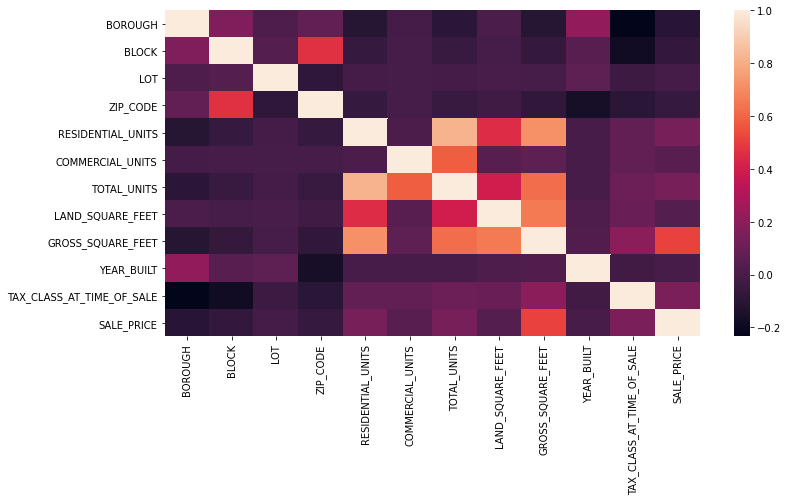

In [ ]:
# correlation matrix between the features (heatmap)
plt.figure(figsize=(12,6))
corr = data.corr()
sns.heatmap(corr)

In [ ]:
# numeric correlation
corr['SALE_PRICE'].sort_values(ascending=False)

SALE_PRICE                   1.000000
GROSS_SQUARE_FEET            0.517838
TAX_CLASS_AT_TIME_OF_SALE    0.156116
TOTAL_UNITS                  0.140147
RESIDENTIAL_UNITS            0.138769
COMMERCIAL_UNITS             0.047686
LAND_SQUARE_FEET             0.040142
YEAR_BUILT                   0.001027
LOT                         -0.009909
ZIP_CODE                    -0.060179
BLOCK                       -0.065597
BOROUGH                     -0.102659
Name: SALE_PRICE, dtype: float64

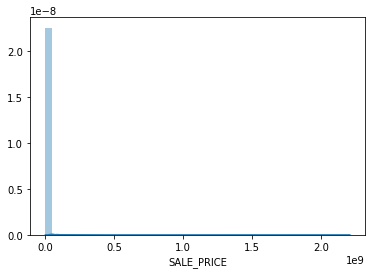

In [ ]:
sns.distplot(data['SALE_PRICE'])

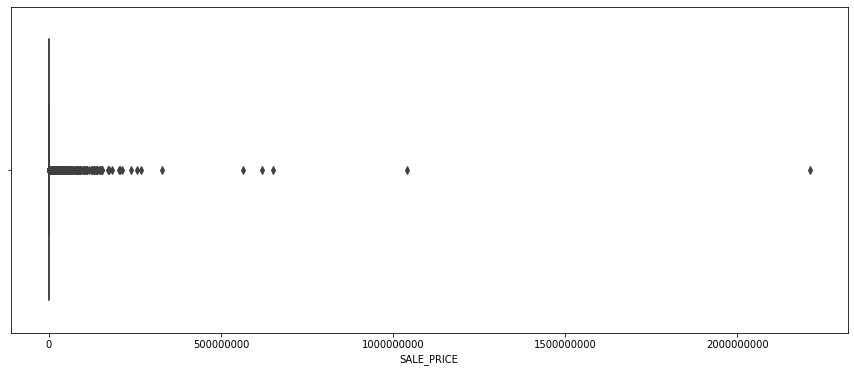

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='SALE_PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
#There are clear outliers in the data, so we need to remove them
data = data[(data['SALE_PRICE'] > 100000) & (data['SALE_PRICE'] < 5000000)]

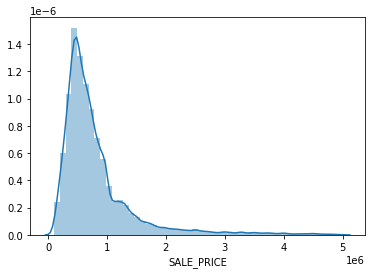

In [ ]:
sns.distplot(data['SALE_PRICE']) #skewed to the right

In [ ]:
#skewness of the data
data['SALE_PRICE'].skew()

2.8185715025694393

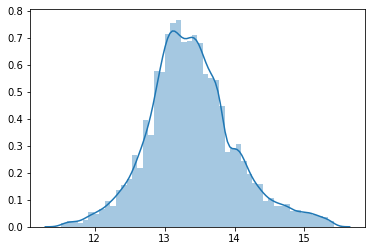

In [ ]:
#Since the Sale Price is highly skewed, we need to transform the data (Log transform the sales price data)
sales_data = np.log([data['SALE_PRICE']])
sns.distplot(sales_data)

[(1875.0, 2017.0)]

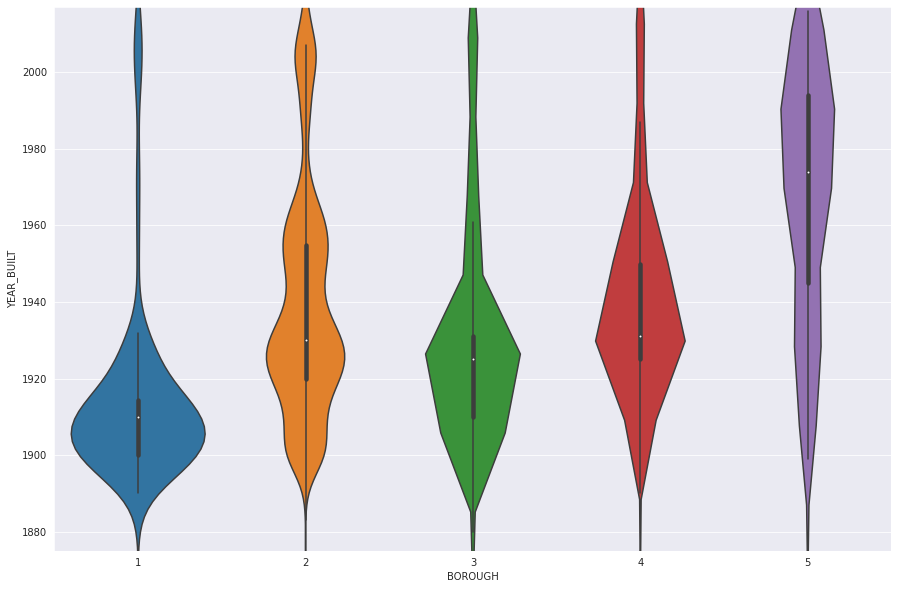

In [ ]:
# Violin Plot - Borough to Year Built
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.violinplot(x='BOROUGH', y='YEAR_BUILT', data = data).set(ylim=(1875,2017))

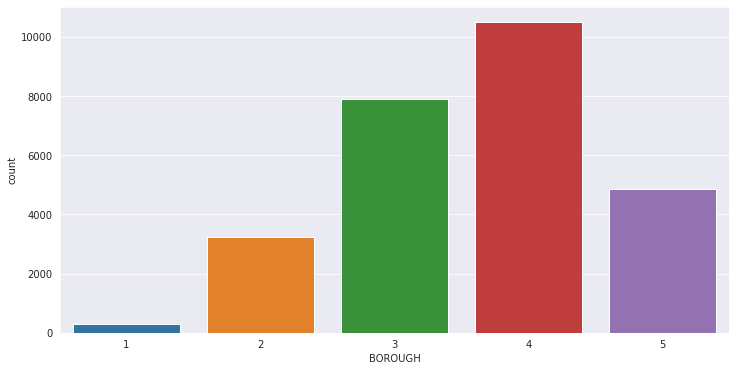

In [ ]:
# Count Plot - Number of Properties Sold in each Borough
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.countplot(x='BOROUGH', data = data)

[(0.0, 8000.0)]

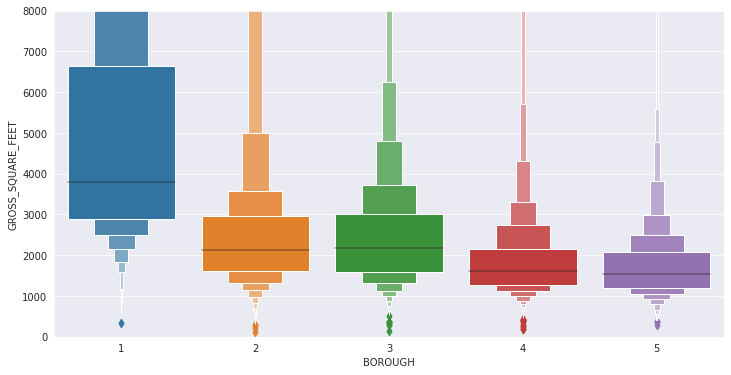

In [ ]:
# Boxen plot - Square Footage per Borough
plt.figure(figsize=(12,6))
sns.boxenplot(x='BOROUGH', y='GROSS_SQUARE_FEET', data = data, ).set(ylim=(0,8000))

<Figure size 864x432 with 0 Axes>

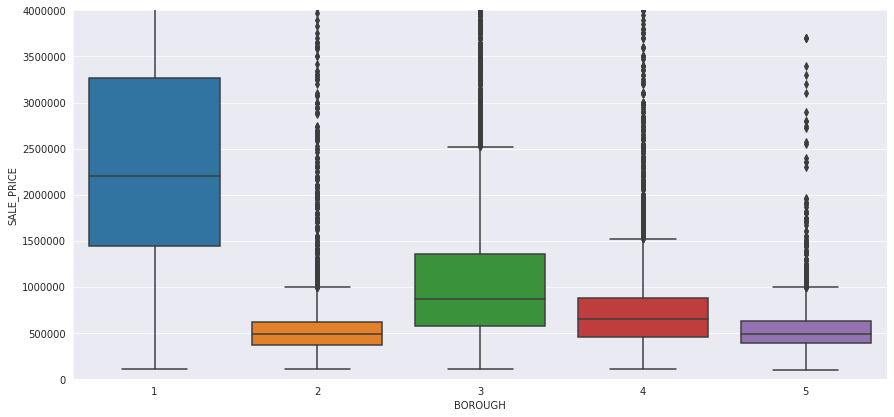

In [ ]:
# Box Plot - Sale Price per Borough
plt.figure(figsize=(12,6))
sns.catplot(x='BOROUGH', y='SALE_PRICE', data = data, height = 6, aspect=2, kind='box').set(ylim=(0,4000000))
plt.ticklabel_format(style='plain', axis='y')

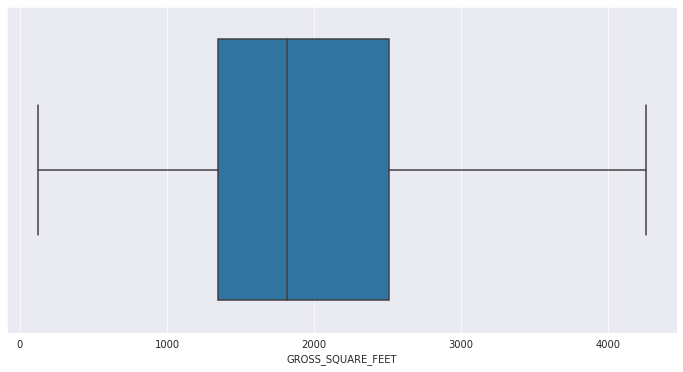

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='GROSS_SQUARE_FEET', data=data, showfliers=False)

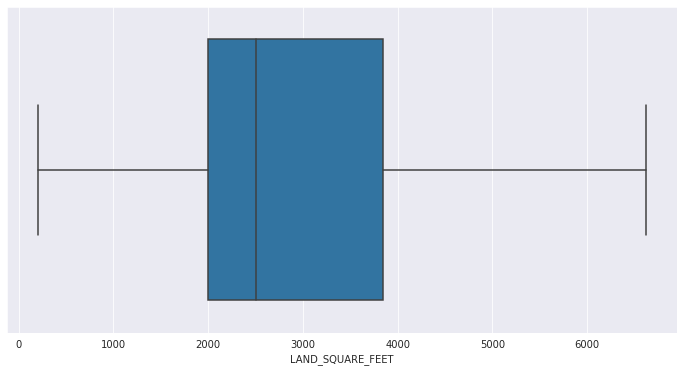

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='LAND_SQUARE_FEET', data=data, showfliers=False) 

In [ ]:
#remove outliers for Land & Gross Square Feet
data = data[data['GROSS_SQUARE_FEET']<10000]
data = data[data['LAND_SQUARE_FEET']<10000]

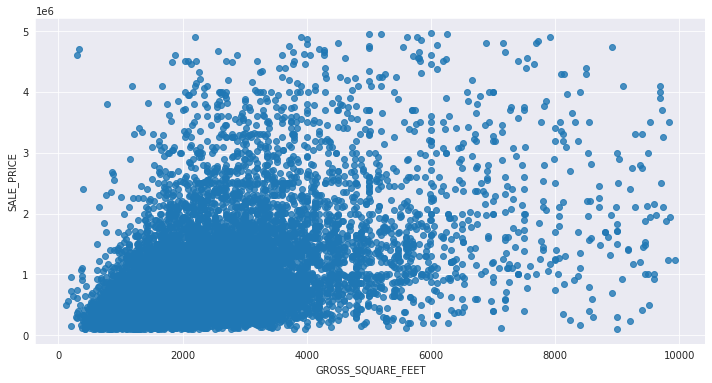

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x='GROSS_SQUARE_FEET', y='SALE_PRICE', data=data, fit_reg=False)

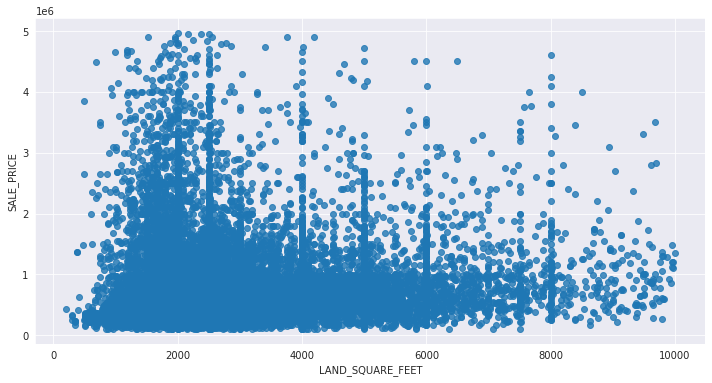

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x='LAND_SQUARE_FEET', y='SALE_PRICE', data=data, fit_reg=False)

In [ ]:
data[['TOTAL_UNITS', 'SALE_PRICE']].groupby(['TOTAL_UNITS'], as_index=False).count().sort_values(by='SALE_PRICE', ascending=False)

,TOTAL_UNITS,SALE_PRICE
1,1,12384
2,2,9429
3,3,2711
4,4,696
6,6,362
5,5,169
8,8,134
7,7,70
9,9,55
10,10,44


In [ ]:
#Remove rows with Total Units == 0 and outlier
data = data[(data['TOTAL_UNITS'] > 0) & (data['TOTAL_UNITS'] != 2261)]

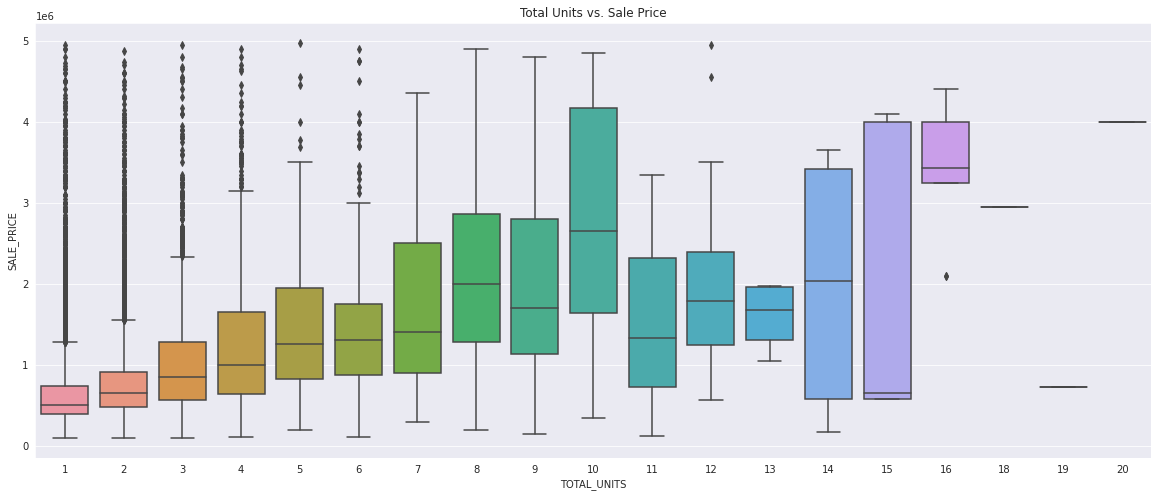

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='TOTAL_UNITS', y='SALE_PRICE', data=data)
plt.title('Total Units vs. Sale Price')
plt.show()

In [ ]:
# Visualizing Categorical Data
cat_data = data.select_dtypes(exclude=[np.number])
cat_data.describe()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_DATE
count,26104,26104,26104,26104,26104,26104,26104
unique,236,22,5,85,25498,87,319
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,A1,416 BARBEY STREET,A1,4/28/2017 0:00
freq,759,12168,23890,4571,3,4566,180


In [ ]:
data['TAX_CLASS_AT_PRESENT'].unique()

array(['2B', '2A', '4', '1', '2'], dtype=object)

In [ ]:
pivot = data.pivot_table(index='TAX_CLASS_AT_PRESENT', values='SALE_PRICE', aggfunc=np.median)
pivot

,SALE_PRICE
TAX_CLASS_AT_PRESENT,
1,591000.0
2,1970282.5
2A,1200000.0
2B,1847500.0
4,1070000.0


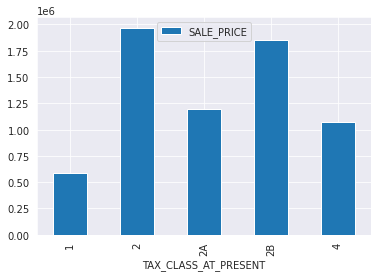

In [ ]:
pivot.plot(kind='bar')

In [ ]:
pivot = data.pivot_table(index='TAX_CLASS_AT_TIME_OF_SALE', values= 'SALE_PRICE', aggfunc=np.median)
pivot

,SALE_PRICE
TAX_CLASS_AT_TIME_OF_SALE,
1,591000
2,1300000
4,1070000


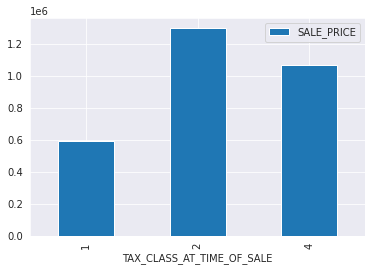

In [ ]:
pivot.plot(kind='bar')

In [ ]:
pivot = data.pivot_table(index='BOROUGH', values='SALE_PRICE', aggfunc=np.median)
pivot

,SALE_PRICE
BOROUGH,
1,2250000
2,475000
3,860000
4,645000
5,485000


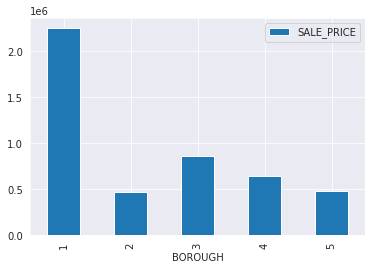

In [ ]:
pivot.plot(kind='bar')

In [ ]:
pivot = data.pivot_table(index='BUILDING_CLASS_CATEGORY', values='SALE_PRICE', aggfunc=np.median)
pivot

,SALE_PRICE
BUILDING_CLASS_CATEGORY,
01 ONE FAMILY DWELLINGS,510000.0
02 TWO FAMILY DWELLINGS,660000.0
03 THREE FAMILY DWELLINGS,816136.5
05 TAX CLASS 1 VACANT LAND,589245.0
06 TAX CLASS 1 - OTHER,461500.0
07 RENTALS - WALKUP APARTMENTS,1275000.0
08 RENTALS - ELEVATOR APARTMENTS,3670000.0
14 RENTALS - 4-10 UNIT,1350000.0
21 OFFICE BUILDINGS,941756.0


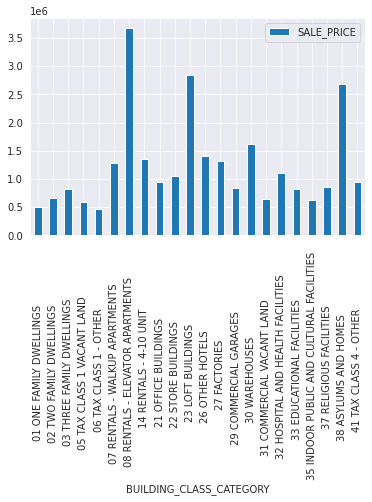

In [ ]:
pivot.plot(kind='bar')

Data Preprocessing

In [ ]:
data.drop(['ADDRESS'], axis=1, inplace=True)

In [ ]:
data.drop(['SALE_DATE'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26104 entries, 1 to 28429
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         26104 non-null  int64 
 1   NEIGHBORHOOD                    26104 non-null  object
 2   BUILDING_CLASS_CATEGORY         26104 non-null  object
 3   TAX_CLASS_AT_PRESENT            26104 non-null  object
 4   BLOCK                           26104 non-null  int64 
 5   LOT                             26104 non-null  int64 
 6   BUILDING_CLASS_AT_PRESENT       26104 non-null  object
 7   ZIP_CODE                        26104 non-null  int64 
 8   RESIDENTIAL_UNITS               26104 non-null  int64 
 9   COMMERCIAL_UNITS                26104 non-null  int64 
 10  TOTAL_UNITS                     26104 non-null  int64 
 11  LAND_SQUARE_FEET                26104 non-null  int64 
 12  GROSS_SQUARE_FEET               26104 non-null

In [ ]:
# Converting Data Types
data['TAX_CLASS_AT_TIME_OF_SALE'] = data['TAX_CLASS_AT_TIME_OF_SALE'].astype('category')
data['TAX_CLASS_AT_PRESENT'] = data['TAX_CLASS_AT_PRESENT'].astype('category')
data['BOROUGH'] = data['BOROUGH'].astype('category')
data['BLOCK'] = data['BLOCK'].astype('category')
data['LOT'] = data['LOT'].astype('category')
data['ZIP_CODE'] = data['ZIP_CODE'].astype('category')

In [ ]:
# Normalizing and Transforming Numerical Columns

numeric_data = data.select_dtypes(include=[np.number])
numeric_data.columns

Index(['RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'SALE_PRICE'],
      dtype='object')

In [ ]:
# Transforming Numeric Columns usign Log(x+1)
from scipy.stats import skew
skewed = data[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
data[skewed] = np.log1p(data[skewed])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data[numeric_data.columns])
scaled = scaler.transform(data[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
  data[col] = scaled[:,i]

In [ ]:
data.head() #all numeric columns have been scaled

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,4.135045,-0.247143,4.223057,-0.343598,2.866742,-0.627513,2,C4,2.996032
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,3.562250,-0.247143,3.624543,-0.946040,1.816726,-0.468180,2,C4,2.651133
7,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,10009,1.247527,3.070730,1.871429,-1.271188,1.309620,-0.695798,2,S3,2.705526
9,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,10009,2.404888,3.070730,2.874981,-0.908112,1.530532,-0.695798,2,S5,3.305649
10,1,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,10009,-2.709517,3.070730,-0.861471,-1.782249,1.453570,-0.946178,4,K4,2.894038


In [ ]:
# One hot encoding Categorical Data

#Dropping columns
data.drop(['BUILDING_CLASS_AT_PRESENT'], axis=1, inplace=True)
data.drop(['BUILDING_CLASS_AT_TIME_OF_SALE'], axis=1, inplace=True)
data.drop(['NEIGHBORHOOD'], axis=1, inplace=True)

In [ ]:
one_hot_features = ['BOROUGH', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'ZIP_CODE', 'TAX_CLASS_AT_TIME_OF_SALE']

In [ ]:
# Bin/Quantization of "BLOCK" values into 10 columns instead of 10,000 to minimize sparsity
cut_label_block = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cut_bins_block = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
data['BLOCK'] = pd.cut(data['BLOCK'], bins=cut_bins_block, labels=cut_label_block)

# Bin/Quantization of "LOT" values into 10 columns instead of 645 to minimize sparsity
cut_label_lot = [0, 1, 2, 3, 4, 5, 6, 7, 8 , 9]
cut_bins_lot = [0, 270, 540, 810, 1080, 1350, 1620, 1890, 2160, 2430, 2700]
data['LOT'] = pd.cut(data['LOT'], bins=cut_bins_lot, labels=cut_label_lot)

# Bin/Quantization of "ZIP_CODE" values into 5 columns instead of 166 to minimize sparsity
cut_label_zipcode = [0, 1, 2, 3, 4]
cut_bins_zipcode = [10001, 10341, 10680, 11019, 11358, 11697]
data['ZIP_CODE'] = pd.cut(data['ZIP_CODE'], bins=cut_bins_zipcode, labels=cut_label_zipcode)

In [ ]:
one_hot_encoder = pd.get_dummies(data[one_hot_features])
one_hot_encoder.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26104 entries, 1 to 28429
Data columns (total 60 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   BOROUGH_1                                                            26104 non-null  uint8
 1   BOROUGH_2                                                            26104 non-null  uint8
 2   BOROUGH_3                                                            26104 non-null  uint8
 3   BOROUGH_4                                                            26104 non-null  uint8
 4   BOROUGH_5                                                            26104 non-null  uint8
 5   BUILDING_CLASS_CATEGORY_01 ONE FAMILY DWELLINGS                      26104 non-null  uint8
 6   BUILDING_CLASS_CATEGORY_02 TWO FAMILY DWELLINGS                      26104 non-null  uint8
 7   BUILDING_CLASS_CATEGOR

In [ ]:
# Replace categorical variables with dummies
dummy_data = data.drop(one_hot_features, axis=1)
dummy_data = pd.concat([dummy_data, one_hot_encoder], axis = 1)

In [ ]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26104 entries, 1 to 28429
Data columns (total 67 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   RESIDENTIAL_UNITS                                                    26104 non-null  float64
 1   COMMERCIAL_UNITS                                                     26104 non-null  float64
 2   TOTAL_UNITS                                                          26104 non-null  float64
 3   LAND_SQUARE_FEET                                                     26104 non-null  float64
 4   GROSS_SQUARE_FEET                                                    26104 non-null  float64
 5   YEAR_BUILT                                                           26104 non-null  float64
 6   SALE_PRICE                                                           26104 non-null  float64
 7   BORO

In [ ]:
dummy_data.head()

,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,BUILDING_CLASS_CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING_CLASS_CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING_CLASS_CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING_CLASS_CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING_CLASS_CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING_CLASS_CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING_CLASS_CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING_CLASS_CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING_CLASS_CATEGORY_21 OFFICE BUILDINGS,BUILDING_CLASS_CATEGORY_22 STORE BUILDINGS,BUILDING_CLASS_CATEGORY_23 LOFT BUILDINGS,BUILDING_CLASS_CATEGORY_26 OTHER HOTELS,BUILDING_CLASS_CATEGORY_27 FACTORIES,BUILDING_CLASS_CATEGORY_29 COMMERCIAL GARAGES,BUILDING_CLASS_CATEGORY_30 WAREHOUSES,BUILDING_CLASS_CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING_CLASS_CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING_CLASS_CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING_CLASS_CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING_CLASS_CATEGORY_37 RELIGIOUS FACILITIES,BUILDING_CLASS_CATEGORY_38 ASYLUMS AND HOMES,BUILDING_CLASS_CATEGORY_41 TAX CLASS 4 - OTHER,TAX_CLASS_AT_PRESENT_1,TAX_CLASS_AT_PRESENT_2,TAX_CLASS_AT_PRESENT_2A,TAX_CLASS_AT_PRESENT_2B,TAX_CLASS_AT_PRESENT_4,BLOCK_0,BLOCK_1,BLOCK_2,BLOCK_3,BLOCK_4,BLOCK_5,BLOCK_6,BLOCK_7,BLOCK_8,BLOCK_9,LOT_0,LOT_1,LOT_2,LOT_3,LOT_4,LOT_5,LOT_6,LOT_7,LOT_8,LOT_9,ZIP_CODE_0,ZIP_CODE_1,ZIP_CODE_2,ZIP_CODE_3,ZIP_CODE_4,TAX_CLASS_AT_TIME_OF_SALE_1,TAX_CLASS_AT_TIME_OF_SALE_2,TAX_CLASS_AT_TIME_OF_SALE_4
1,4.135045,-0.247143,4.223057,-0.343598,2.866742,-0.627513,2.996032,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,3.562250,-0.247143,3.624543,-0.946040,1.816726,-0.468180,2.651133,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
7,1.247527,3.070730,1.871429,-1.271188,1.309620,-0.695798,2.705526,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9,2.404888,3.070730,2.874981,-0.908112,1.530532,-0.695798,3.305649,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
10,-2.709517,3.070730,-0.861471,-1.782249,1.453570,-0.946178,2.894038,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
data['BLOCK'].value_counts().head(10)

4    3192
5    2963
3    2963
1    2774
6    2014
0    1956
2    1877
7    1856
8    1613
9     863
Name: BLOCK, dtype: int64

In [ ]:
data['ZIP_CODE'].describe()

count     26094
unique        5
top           3
freq       9294
Name: ZIP_CODE, dtype: int64

In [ ]:
data['LOT'].describe()

count     26104
unique       10
top           0
freq      25397
Name: LOT, dtype: int64

In [ ]:
data['BLOCK'].describe()

count     22071
unique       10
top           4
freq       3192
Name: BLOCK, dtype: int64

In [ ]:
# Splitting Data

y = dummy_data['SALE_PRICE']
X = dummy_data.drop('SALE_PRICE', axis=1)

X.shape, y.shape

((26104, 66), (26104,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20883, 66), (5221, 66), (20883,), (5221,))

Building the Artificial Neural Network

In [ ]:
# Import Tensorflow & Keras
import tensorflow as tf
from sklearn.metrics import mean_absolute_error

In [ ]:
# Initializing the ANN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import layers
ann = tf.keras.models.Sequential() # Sequential Class

Using TensorFlow backend.


In [ ]:
# The Input Layer & First Hidden Layer
ann.add(tf.keras.layers.Dense(units = 45, activation = 'relu')) #Dense Class

In [ ]:
# The Output Layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'linear')) #Dense Class

Training the Artificial Neural Network

In [ ]:
# Compiling the ANN
from keras import backend as K
init = tf.initializers.RandomNormal()
ann.compile(optimizer='Adam', loss= 'mean_squared_error') # Performing Stochastic Gradient Descent
K.set_value(ann.optimizer.learning_rate, 0.01)

In [ ]:
# Training the ANN
ann.fit(X_train, y_train, epochs= 25, batch_size= 32)

Epoch 1/25

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

653/653 [==============================] - 1s 1ms/step - loss: 0.5056
Epoch 2/25
653/653 [==============================] - 1s 1ms/step - loss: 0.4614
Epoch 3/25
653/653 [==============================] - 1s 1ms/step - loss: 0.4392
Epoch 4/25
653/653 [==============================] - 1s 1ms/step - loss: 0.4323
Epoch 5/25
653/653 [==============================] - 1s 1ms/step - loss: 0.4299
Epoch 6/25
653/653 [==============================] - 1s 1ms/step - loss: 0.4322
Epoch 7/25
653/653 [==

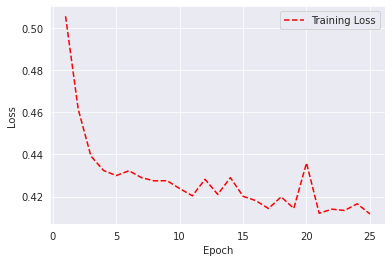

In [ ]:
# Visualize Loss
training_loss = ann.history.history['loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Predicting Test Results

y_pred = ann.predict(X_test)
y_pred.reshape(len(y_pred))

pred_data = np.array(y_pred)
test_data = np.array(y_test)
new_pred_data = np.transpose(pred_data)

In [ ]:
np.transpose(pred_data)

array([[-0.6044759 , -0.2802968 , -0.71638376, ..., -0.753641  ,
        -0.43899748, -0.14711791]], dtype=float32)

In [ ]:
new_pred_data

array([[-0.6044759 , -0.2802968 , -0.71638376, ..., -0.753641  ,
        -0.43899748, -0.14711791]], dtype=float32)

In [ ]:
new_pred_data = new_pred_data.flatten()

In [ ]:
new_pred_data.shape

(5221,)

In [ ]:
final_data = np.concatenate((new_pred_data, test_data), axis=0)

In [ ]:
data = np.concatenate((new_pred_data.reshape(len(new_pred_data), 1), test_data.reshape(len(test_data), 1)), 1)

In [ ]:
data

array([[-0.60447592, -0.65227767],
       [-0.2802968 , -0.49767702],
       [-0.71638376, -1.91352385],
       ...,
       [-0.75364101, -0.24672852],
       [-0.43899748,  0.02852368],
       [-0.14711791, -0.77143912]])

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(data)

[[-6.04475915e-01 -6.52277674e-01]
 [-2.80296803e-01 -4.97677018e-01]
 [-7.16383755e-01 -1.91352385e+00]
 [ 4.54494268e-01  2.86132537e-01]
 [ 7.84053326e-01  3.70647667e-01]
 [ 1.01622808e+00  9.68601312e-01]
 [ 7.27247074e-02  8.72735810e-01]
 [ 8.53952229e-01 -3.67913426e-01]
 [ 3.35204750e-01  3.26818154e-01]
 [-7.56637156e-01 -5.23342920e-01]
 [ 2.85253257e-01  7.21757963e-01]
 [-9.85159814e-01 -1.59955174e+00]
 [-2.10399240e-01  2.62110215e-01]
 [ 4.66788188e-02 -1.99803866e+00]
 [ 6.35899186e-01 -9.91456329e-01]
 [-5.41730642e-01 -1.43689096e-01]
 [ 4.61408406e-01  6.53802591e-01]
 [-3.47683579e-01 -1.31054152e-01]
 [-4.33783501e-01 -5.23342920e-01]
 [-4.12925035e-01 -4.03769459e-01]
 [ 4.22029257e-01 -4.03769459e-01]
 [-7.65066981e-01 -4.07068124e-01]
 [-3.50027055e-01 -5.09229922e-01]
 [ 8.08970392e-01  1.29271784e+00]
 [ 4.44120228e-01  4.70537882e-01]
 [ 3.45750898e-01  3.70647667e-01]
 [ 8.55359852e-01  9.39693826e-01]
 [ 3.43436301e-01  4.41201487e-01]
 [ 2.54354477e-01  1

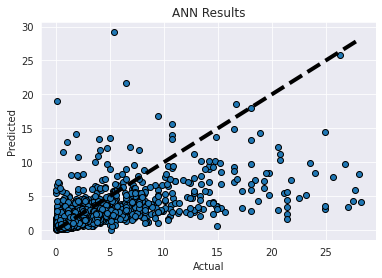

In [ ]:
y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0,0,0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('ANN Results')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(test_data, new_pred_data)))
print('R Squared Value:', r2_score(y_test, y_pred))

RMSE: 0.6536903911113296
R Squared Value: 0.4318812217759872


In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(np.exp(data))

[[ 0.54636069  0.52085808]
 [ 0.75555946  0.60794126]
 [ 0.48851566  0.14755949]
 [ 1.57537646  1.33126889]
 [ 2.19033243  1.44867257]
 [ 2.7627542   2.63425738]
 [ 1.07543444  2.39344993]
 [ 2.34891197  0.6921771 ]
 [ 1.39822664  1.38654932]
 [ 0.46924176  0.59253643]
 [ 1.33009884  2.058048  ]
 [ 0.37337955  0.20198704]
 [ 0.81026069  1.29966978]
 [ 1.04778543  0.13560098]
 [ 1.88871969  0.37103595]
 [ 0.5817406   0.866157  ]
 [ 1.58630658  1.92283871]
 [ 0.70632234  0.87717027]
 [ 0.64805254  0.59253643]
 [ 0.66171189  0.66779806]
 [ 1.52505314  0.66779806]
 [ 0.46530276  0.66559885]
 [ 0.70466902  0.60095819]
 [ 2.24559471  3.64267331]
 [ 1.55911792  1.60085503]
 [ 1.41305058  1.44867257]
 [ 2.35222068  2.55919774]
 [ 1.40978372  1.5545739 ]
 [ 1.28962887  1.2178011 ]
 [ 1.01415793  1.2740384 ]
 [ 1.80324036  7.24488756]
 [ 0.72739169  0.49712524]
 [ 0.41872784  0.62435813]
 [ 0.28917658  0.23314937]
 [ 1.21195416  0.57438087]
 [ 0.81402597  1.12180486]
 [ 2.28365228  5.76583337]
 

In [ ]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=1000, random_state=0, max_depth=16)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))
print(rmse)

2.931349883174693


In [ ]:
# Ridge Regression

from sklearn.linear_model import RidgeCV

ridge = RidgeCV()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse(y_test, y_pred_ridge)
print(rmse)

TypeError: ignored

In [ ]:
# Lasso Regression

from sklearn.linear_model import Lasso

lasso_regr = Lasso()
lasso_regr.fit(X_train, y_train)
y_pred_lasso = lasso_regr.predict(X_test)
rmse(y_test, y_pred_lasso)
print(rmse)


TypeError: ignored